In [129]:
% matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt


In [293]:
HomeLang = pd.read_csv('data/home_language_NY_CA.csv', skiprows=3)
HomeLang.columns = ['col1', 'ppl']
HomeLang['geo'] = HomeLang.col1.apply(lambda c: c if c in ['New York', 'California'] else None)
HomeLang['lang'] = HomeLang.col1.apply(lambda c: None if c in ['New York', 'California'] 
                                       else ' -> English' if c == ' -> N/A (GQ/vacant)' 
                                       else ' -> Tagalog' if c == ' -> Filipino' 
                                       else ' -> Chinese' if c == ' -> Mandarin' 
                                       else ' -> Chinese' if c == ' -> Cantonese' 
                                       else ' -> Chinese' if c == ' -> Min Nan Chinese' 
                                       else ' -> Serbo-Croatian' if c == ' -> Serbian' 
                                       else ' -> Serbo-Croatian' if c == ' -> Croatian' 
                                       else ' -> Serbo-Croatian' if c == ' -> Bosnian' 
                                       else ' -> Serbo-Croatian' if c == ' -> Serbocroatian' 
                                       else c).fillna(method='ffill')
HomeLang = HomeLang[~HomeLang.ppl.isnull()][['geo', 'lang', 'ppl']]
HomeLang['lang'] = HomeLang['lang'].apply(lambda s: s[4:])
HomeLang = HomeLang.groupby(['lang', 'geo'])['ppl'].sum().unstack().sort_values('New York', ascending=False)
HomeLang.columns = ['CA', 'NY']

HomeLang

,CA,NY
lang,,
English,22856501.0,14091692.0
Spanish,10525320.0,2818953.0
Chinese,1181658.0,586689.0
Russian,157294.0,221202.0
Italian,59371.0,164523.0
Haitian,8538.0,155232.0
Yiddish,2757.0,137544.0
French,128280.0,130911.0
Bengali,26613.0,119008.0


In [295]:
Pivot = HomeLang[HomeLang.index != 'English'].copy()
#Pivot = Pivot[(Pivot.index != 'English')&(Pivot.index != 'Spanish')]

Pivot.loc['Tongan', 'NY'] = 1

Pivot['total'] = Pivot.sum(axis=1)

Pivot.CA = 100 * Pivot.CA / Pivot.CA.sum()
Pivot.NY = 100 * Pivot.NY / Pivot.NY.sum()

Pivot['skew'] = (Pivot.CA / Pivot.NY).apply(lambda x: math.log(x))
Pivot['ratio_ca'] = (Pivot.CA / Pivot.NY)
Pivot['ratio_ny'] = (Pivot.NY / Pivot.CA)

Pivot[Pivot.total>100000].sort_values('ratio_ca', ascending=False)#.sort_values('skew')

,CA,NY,total,skew,ratio_ca,ratio_ny
lang,,,,,,
Armenian,1.196316,0.125383,200077.0,2.255633,9.541327,0.104807
Vietnamese,3.419801,0.423111,575634.0,2.089703,8.082511,0.123724
Tagalog,4.913134,1.332700,868360.0,1.304705,3.686603,0.271252
Farsi,1.204061,0.374185,215524.0,1.168705,3.217823,0.310769
Japanese,0.879889,0.602099,176253.0,0.379374,1.461370,0.684289
Punjabi,0.888205,0.634816,179461.0,0.335868,1.399154,0.714718
Spanish,65.267854,49.398663,13344273.0,0.278576,1.321247,0.756861
Korean,2.307665,1.790122,474296.0,0.253952,1.289110,0.775729
Hindi,1.120483,1.047290,240457.0,0.067554,1.069888,0.934677


In [326]:
t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 11000)]

t.sort_values('ratio_ca', ascending=False)

,CA,NY,total,skew,ratio_ca,ratio_ny
lang,,,,,,
Hmong,0.473362,0.001945,76447.0,5.494528,243.356575,0.004109
Samoan,0.116846,0.002506,18986.0,3.842210,46.628417,0.021446
Assyrian Neo-Aramaic,0.108512,0.002856,17662.0,3.637307,37.989387,0.026323
Ilocano,0.141433,0.013861,23599.0,2.322727,10.203458,0.098006
Armenian,1.196316,0.125383,200077.0,2.255633,9.541327,0.104807
Vietnamese,3.419801,0.423111,575634.0,2.089703,8.082511,0.123724
Khmer,0.476177,0.077490,81212.0,1.815640,6.145010,0.162734
Lao,0.209322,0.053255,36795.0,1.368788,3.930583,0.254415
Tagalog,4.913134,1.332700,868360.0,1.304705,3.686603,0.271252


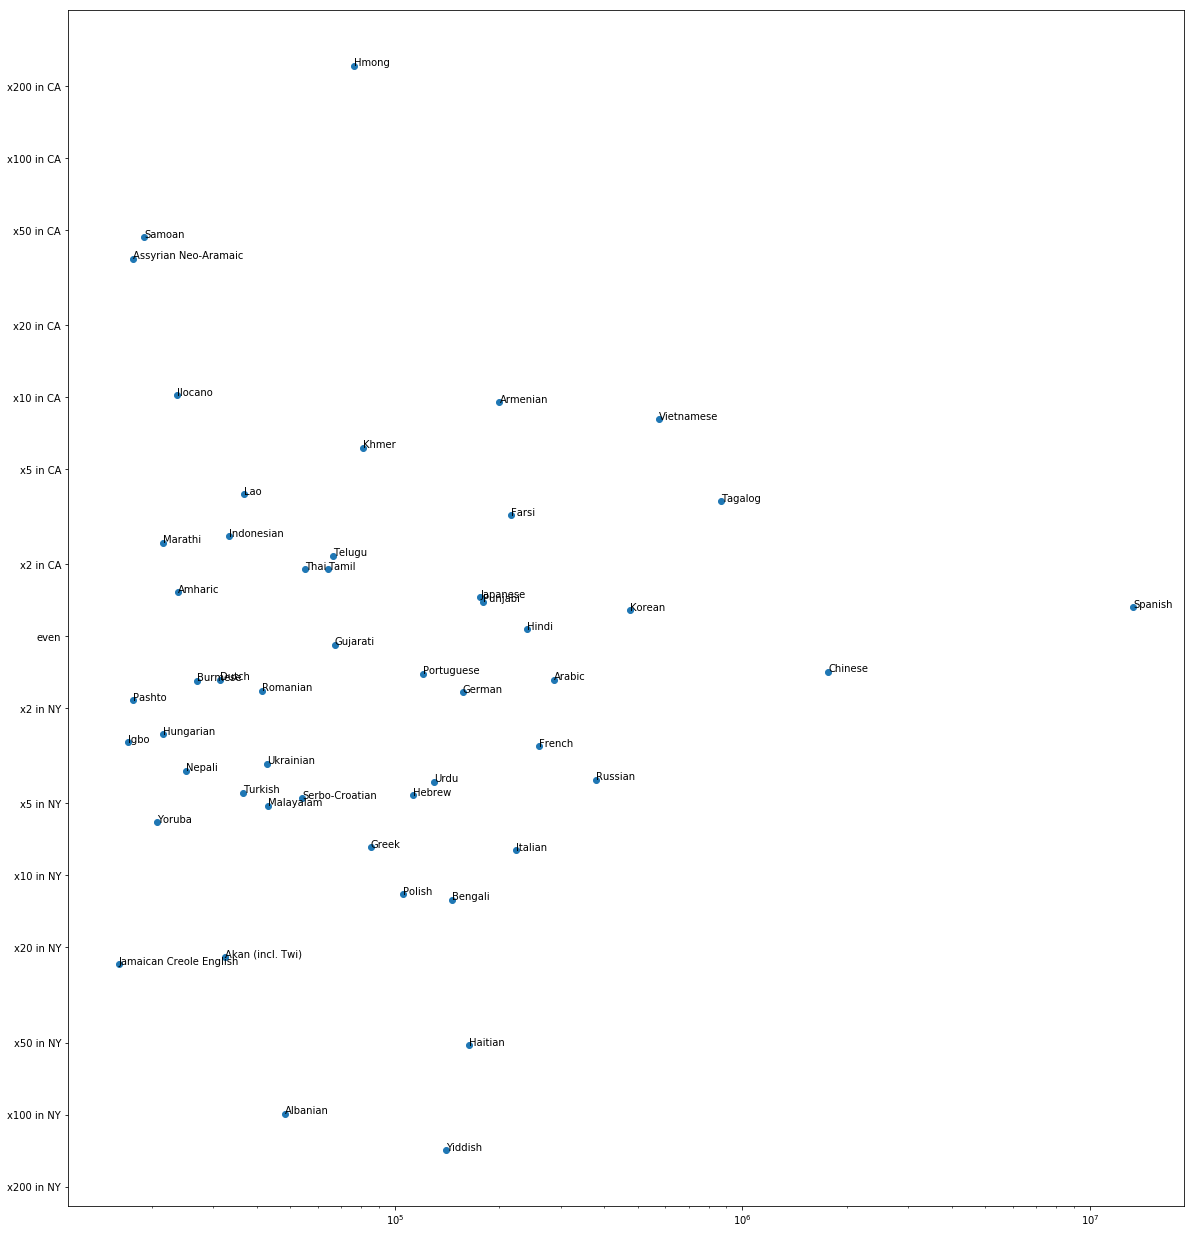

In [329]:
threshold = 0.1

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 11000)]

x = t['total']
y = t['skew']
n = list(t.reset_index().lang)

fig, ax = plt.subplots()
ax.scatter(x, y)

ticks = [2, 5, 10, 20, 50, 100, 200]

ax.set_yticks((list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks]))

ax.set_xscale('log')

fig.set_size_inches(20, 22)

ax.set_yticklabels((list(reversed(['x' + str(tk) + ' in NY' for tk in ticks])) + ['even'] + ['x' + str(tk) + ' in CA' for tk in ticks]))

for i, txt in enumerate(n):
    #print txt, x[i], y[i]
    ax.annotate(txt, (x[i], y[i]))

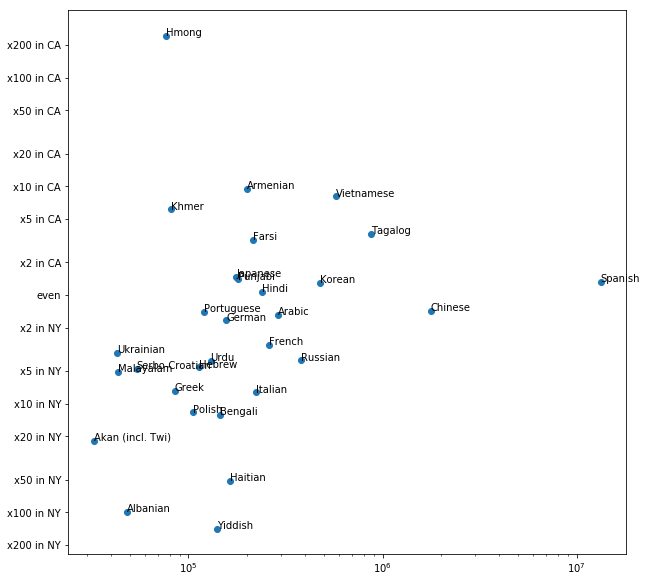

In [334]:
threshold = 0.4

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 11000)]

x = t['total']
y = t['skew']
n = list(t.reset_index().lang)

fig, ax = plt.subplots()
ax.scatter(x, y)

ticks = [2, 5, 10, 20, 50, 100, 200]

ax.set_yticks((list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks]))

ax.set_xscale('log')

fig.set_size_inches(10, 10)

ax.set_yticklabels((list(reversed(['x' + str(tk) + ' in NY' for tk in ticks])) + ['even'] + ['x' + str(tk) + ' in CA' for tk in ticks]))

for i, txt in enumerate(n):
    #print txt, x[i], y[i]
    ax.annotate(txt, (x[i], y[i]))

In [306]:
list(reversed([-math.log(x) for x in ticks])) + [0] + [math.log(x) for x in ticks]


[-6.907755278982137,
 -4.605170185988092,
 -3.912023005428146,
 -2.995732273553991,
 -2.302585092994046,
 -1.6094379124341003,
 -0.6931471805599453,
 0,
 0.6931471805599453,
 1.6094379124341003,
 2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 6.907755278982137]

In [319]:
(list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks])

[-6.214608098422191,
 -5.298317366548036,
 -4.605170185988092,
 -3.912023005428146,
 -2.995732273553991,
 -2.302585092994046,
 -1.6094379124341003,
 -0.6931471805599453,
 0,
 2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 5.298317366548036,
 6.214608098422191]

In [262]:
list(reversed(['x' + str(x) + ' in NY'  for x in [2, 5, 10, 20, 50, 100, 1000, 10000]])) + ['equal'] +  ['x' + str(x) + ' in CA'  for x in [2, 5, 10, 20, 50, 100, 1000, 10000]]

['x10000 in NY',
 'x1000 in NY',
 'x100 in NY',
 'x50 in NY',
 'x20 in NY',
 'x10 in NY',
 'x5 in NY',
 'x2 in NY',
 'equal',
 'x2 in CA',
 'x5 in CA',
 'x10 in CA',
 'x20 in CA',
 'x50 in CA',
 'x100 in CA',
 'x1000 in CA',
 'x10000 in CA']

In [250]:
def labelConvert(x):
    return int(math.exp(abs(x)))

[labelConvert(x.get_position()[1]) for x in ax.get_yticklabels()]

[99, 49, 19, 9, 4, 2, 1, 2, 4, 10, 19, 49, 100, 999, 10000]